In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [52]:
df = df.drop(['UDI','Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [53]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [54]:
df_num = df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [57]:
df_num = pd.DataFrame(df_num, columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
                                         ,'Torque [Nm]','Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [58]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [59]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [60]:
X = pd.concat([df_cat,df_num],axis=1)
X

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,0.0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,1.0,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,1.0,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9996,1.0,0.0,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.0,0.0,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9998,1.0,0.0,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [61]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, accuracy_score,precision_score, roc_auc_score, recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
target_names=["Machine Failure"]




In [65]:
#CONFUSION_MATRIX_STORAGE
CMS = {}
results={}
#FIT
dt_model01 = DecisionTreeClassifier()
dt_model01.fit(X_train, y_train)

#Predict
dt_model01_prediction = dt_model01.predict(X_test)
CMS["dt_model01"] = confusion_matrix(y_test, dt_model01_prediction)

#validation
dt_model01_cv_recall = cross_val_score(dt_model01, X, y, cv=5, scoring="recall")




In [66]:
#STATS
dt_model01_acc = accuracy_score(y_test, dt_model01_prediction)
dt_model01_rec = recall_score(y_test, dt_model01_prediction)
dt_model01_pre = precision_score(y_test,dt_model01_prediction)
dt_model01_f1s = f1_score(y_test, dt_model01_prediction)
dt_model01_test_probs = dt_model01.predict_proba(X_test)[:, 1]
dt_model01_roc_auc = roc_auc_score(y_test, dt_model01_test_probs)



In [67]:
#RESULTS_DICT
results['dt_model01'] = {
        "acc":dt_model01_acc,
        "rec":dt_model01_rec,
        "pre":dt_model01_pre,
        "f1s":dt_model01_f1s,
        "roc_auc":dt_model01_roc_auc,
        "cv_recall":np.mean(dt_model01_cv_recall)
    }
results


{'dt_model01': {'acc': 0.981,
  'rec': 0.7123287671232876,
  'pre': 0.7536231884057971,
  'f1s': 0.732394366197183,
  'roc_auc': 0.8517533820048198,
  'cv_recall': 0.5872695346795436}}

In [68]:
#GRID_SEARCH
from sklearn.model_selection import GridSearchCV


In [69]:
#PARAM_GRID_01
param_grid_01 = {
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion': ['gini','entropy']
}

#DT_MODEL02 - #PARAM_GRID_01
dt_model02 = GridSearchCV(DecisionTreeClassifier(),param_grid_01,refit=True)
dt_model02.fit(X_train,y_train)
dt_model02_prediction = dt_model02.predict(X_test)
CMS["dt_model02"] = confusion_matrix(y_test, dt_model02_prediction)

#DT_MODEL02_STATS
dt_model02_acc = accuracy_score(y_test, dt_model02_prediction)
dt_model02_rec = recall_score(y_test, dt_model02_prediction)
dt_model02_pre = precision_score(y_test,dt_model02_prediction)
dt_model02_f1s = f1_score(y_test, dt_model02_prediction)
dt_model02_test_probs = dt_model02.predict_proba(X_test)[:, 1]
dt_model02_roc_auc = roc_auc_score(y_test, dt_model02_test_probs)

#validation
dt_model02_cv_recall = cross_val_score(dt_model02, X, y, cv=5, scoring="recall")
#ADD TO RESULTS



In [70]:
results['dt_model02'] = {
    "acc":dt_model02_acc,
    "rec":dt_model02_rec,
    "pre":dt_model02_pre,
    "f1s":dt_model02_f1s,
    "roc_auc":dt_model02_roc_auc,
    "cv_recall":np.mean(dt_model02_cv_recall)
}
results

{'dt_model01': {'acc': 0.981,
  'rec': 0.7123287671232876,
  'pre': 0.7536231884057971,
  'f1s': 0.732394366197183,
  'roc_auc': 0.8517533820048198,
  'cv_recall': 0.5872695346795436},
 'dt_model02': {'acc': 0.981,
  'rec': 0.6438356164383562,
  'pre': 0.7966101694915254,
  'f1s': 0.712121212121212,
  'roc_auc': 0.8545826787326456,
  'cv_recall': 0.3631255487269535}}

In [71]:
#DT_MODEL02 - #PARAM_GRID01_BEST
model_name = ""
print("dt_model02 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",dt_model02.best_estimator_)
print(f"BEST PARAMS: \n",dt_model02.best_params_)
print(f"BEST SCORE: \n",dt_model02.best_score_)
print(f"BEST INDEX: \n",dt_model02.best_index_)

dt_model02 gridsearch cv 
BEST ESTIMATOR: 
 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
BEST PARAMS: 
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
BEST SCORE: 
 0.9810000000000001
BEST INDEX: 
 22


In [80]:
#PARAM_GRID_02_SCORING = RECALL
param_grid_02 = {
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,4,8],
    'criterion':['entropy', 'gini']
}

#DT_MODEL03 - #PARAM_GRID_02
dt_model03 = GridSearchCV(DecisionTreeClassifier(),param_grid_02,refit=True, scoring='recall')
dt_model03.fit(X_train,y_train)
dt_model03_prediction = dt_model03.predict(X_test)
CMS["dt_model03"] = confusion_matrix(y_test, dt_model03_prediction)

#DT_MODEL03_STATS
dt_model03_acc = accuracy_score(y_test, dt_model03_prediction)
dt_model03_rec = recall_score(y_test, dt_model03_prediction)
dt_model03_pre = precision_score(y_test,dt_model03_prediction)
dt_model03_f1s = f1_score(y_test, dt_model03_prediction)
dt_model03_test_probs = dt_model03.predict_proba(X_test)[:, 1]
dt_model03_roc_auc = roc_auc_score(y_test, dt_model03_test_probs)

#VALIDATION
dt_model03_cv_recall = cross_val_score(dt_model03, X, y, cv=5, scoring="recall")

In [73]:
#ADD TO RESULTS
results['dt_model03'] = {
    "acc":dt_model03_acc,
    "rec":dt_model03_rec,
    "pre":dt_model03_pre,
    "f1s":dt_model03_f1s,
    "roc_auc":dt_model03_roc_auc,
    "cv_recall":np.mean(dt_model03_cv_recall)
}
results

{'dt_model01': {'acc': 0.981,
  'rec': 0.7123287671232876,
  'pre': 0.7536231884057971,
  'f1s': 0.732394366197183,
  'roc_auc': 0.8517533820048198,
  'cv_recall': 0.5872695346795436},
 'dt_model02': {'acc': 0.981,
  'rec': 0.6438356164383562,
  'pre': 0.7966101694915254,
  'f1s': 0.712121212121212,
  'roc_auc': 0.8545826787326456,
  'cv_recall': 0.3631255487269535},
 'dt_model03': {'acc': 0.9825,
  'rec': 0.6712328767123288,
  'pre': 0.8166666666666667,
  'f1s': 0.7368421052631579,
  'roc_auc': 0.8520448422205003,
  'cv_recall': 0.5665935030728709}}

In [74]:
#DT_MODEL03 - #PARAM_GRID02_BEST
print("dt_model03 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",dt_model03.best_estimator_)
print(f"BEST PARAMS: \n",dt_model03.best_params_)
print(f"BEST SCORE: \n",dt_model03.best_score_)
print(f"BEST INDEX: \n",dt_model03.best_index_)

dt_model03 gridsearch cv 
BEST ESTIMATOR: 
 DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5)
BEST PARAMS: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
BEST SCORE: 
 0.6355695317959469
BEST INDEX: 
 19


In [96]:
#FEATURE_REMOVAL
X_drop = X.drop('Process temperature [K]', axis=1)
X_drop

X_train, X_test, y_train, y_test = train_test_split(X_drop,y,test_size=0.2,random_state=101)

#FIT
dt_model04 = DecisionTreeClassifier()
dt_model04.fit(X_train, y_train)
#PREDICTION
dt_model04_prediction = dt_model04.predict(X_test)
CMS["dt_model04"] = confusion_matrix(y_test, dt_model04_prediction)

#VALIDATION
dt_model04_cv_recall = cross_val_score(dt_model04, X, y, cv=5, scoring="recall")

In [97]:
#FEATURE_REMOVAL_STATS
dt_model04_acc = accuracy_score(y_test, dt_model04_prediction)
dt_model04_rec = recall_score(y_test, dt_model04_prediction)
dt_model04_pre = precision_score(y_test,dt_model04_prediction)
dt_model04_f1s = f1_score(y_test, dt_model04_prediction)
dt_model04_test_probs = dt_model04.predict_proba(X_test)[:, 1]
dt_model04_roc_auc = roc_auc_score(y_test, dt_model04_test_probs)



In [98]:
#FEATURE_REMOVAL_RESULTS_DICT
results['dt_model04'] = {
    "acc":dt_model04_acc,
    "rec":dt_model04_rec,
    "pre":dt_model04_pre,
    "f1s":dt_model04_f1s,
    "roc_auc":dt_model04_roc_auc,
    "cv_recall":np.mean(dt_model04_cv_recall)
}
results


{'dt_model01': {'acc': 0.981,
  'rec': 0.7123287671232876,
  'pre': 0.7536231884057971,
  'f1s': 0.732394366197183,
  'roc_auc': 0.8517533820048198,
  'cv_recall': 0.5872695346795436},
 'dt_model02': {'acc': 0.981,
  'rec': 0.6438356164383562,
  'pre': 0.7966101694915254,
  'f1s': 0.712121212121212,
  'roc_auc': 0.8545826787326456,
  'cv_recall': 0.3631255487269535},
 'dt_model03': {'acc': 0.9825,
  'rec': 0.6712328767123288,
  'pre': 0.8166666666666667,
  'f1s': 0.7368421052631579,
  'roc_auc': 0.8520448422205003,
  'cv_recall': 0.5665935030728709},
 'dt_model04': {'acc': 0.9715,
  'rec': 0.5616438356164384,
  'pre': 0.6212121212121212,
  'f1s': 0.5899280575539569,
  'roc_auc': 0.7743351508128896,
  'cv_recall': 0.6078577699736611}}

In [103]:
#UNDER_SAMPLING
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:,-1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]






Class 1 count: 7734, Class 2 count: 266


In [104]:
# Create a Decision Tree classifier
dt_model05 = DecisionTreeClassifier()

# Train the classifier on the undersampled training data (FIT)
dt_model05.fit(X_train_u, y_train_u)

# Make predictions on the test set
dt_model05_prediction = dt_model05.predict(X_test)
CMS["dt_model05"] = confusion_matrix(y_test, dt_model05_prediction)

#VALIDATION
dt_model05_cv_recall = cross_val_score(dt_model05, X, y, cv=5, scoring="recall")

In [105]:
#UNDERSAMPLING_STATS
dt_model05_acc = accuracy_score(y_test, dt_model05_prediction)
dt_model05_rec = recall_score(y_test, dt_model05_prediction)
dt_model05_pre = precision_score(y_test, dt_model05_prediction)
dt_model05_f1s = f1_score(y_test, dt_model05_prediction)
dt_model05_test_probs = dt_model05.predict_proba(X_test)[:, 1]
dt_model05_roc_auc = roc_auc_score(y_test, dt_model05_test_probs)

In [106]:
#ADD TO RESULTS
results['dt_model05'] = {
    "acc":dt_model05_acc,
    "rec":dt_model05_rec,
    "pre":dt_model05_pre,
    "f1s":dt_model05_f1s,
    "roc_auc":dt_model05_roc_auc,
    "cv_recall":np.mean(dt_model05_cv_recall)
}
results

{'dt_model01': {'acc': 0.981,
  'rec': 0.7123287671232876,
  'pre': 0.7536231884057971,
  'f1s': 0.732394366197183,
  'roc_auc': 0.8517533820048198,
  'cv_recall': 0.5872695346795436},
 'dt_model02': {'acc': 0.981,
  'rec': 0.6438356164383562,
  'pre': 0.7966101694915254,
  'f1s': 0.712121212121212,
  'roc_auc': 0.8545826787326456,
  'cv_recall': 0.3631255487269535},
 'dt_model03': {'acc': 0.9825,
  'rec': 0.6712328767123288,
  'pre': 0.8166666666666667,
  'f1s': 0.7368421052631579,
  'roc_auc': 0.8520448422205003,
  'cv_recall': 0.5665935030728709},
 'dt_model04': {'acc': 0.9715,
  'rec': 0.5616438356164384,
  'pre': 0.6212121212121212,
  'f1s': 0.5899280575539569,
  'roc_auc': 0.7743351508128896,
  'cv_recall': 0.6078577699736611},
 'dt_model05': {'acc': 0.8935,
  'rec': 0.8904109589041096,
  'pre': 0.24074074074074073,
  'f1s': 0.3790087463556851,
  'roc_auc': 0.8920139900903526,
  'cv_recall': 0.6168129938542581}}

In [108]:
#UnderSampling + gridsearchCV
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df['Machine failure'] == 0]
target2 = train_df[train_df['Machine failure'] == 1]

'''target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]'''

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:,-1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]
print(type(y_train_u))

#PARAM_GRID_03
param_grid_03 = {
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,4,8],
    'criterion':['entropy', 'gini']
}



#DT_MODEL06 - #PARAM_GRID_03
dt_model06 = GridSearchCV(DecisionTreeClassifier(),param_grid_03,refit=True, scoring='recall')
dt_model06.fit(X_train_u, y_train_u.values.ravel())
dt_model06_prediction = dt_model06.predict(X_test)
CMS["dt_model06"] = confusion_matrix(y_test, dt_model06_prediction)

#DT_MODEL06_STATS
dt_model06_acc = accuracy_score(y_test, dt_model06_prediction)
dt_model06_rec = recall_score(y_test, dt_model06_prediction)
dt_model06_pre = precision_score(y_test,dt_model06_prediction)
dt_model06_f1s = f1_score(y_test, dt_model06_prediction)
dt_model06_test_probs = dt_model06.predict_proba(X_test)[:, 1]
dt_model06_roc_auc = roc_auc_score(y_test, dt_model06_test_probs)


#VALIDATION
dt_model06_cv_recall = cross_val_score(dt_model06, X, y, cv=5, scoring="recall")


Class 1 count: 7734, Class 2 count: 266
<class 'pandas.core.frame.DataFrame'>


In [135]:
#DT_MODEL06 - #PARAM_GRID03_BEST
print("dt_model06 gridsearch cv - undersample ")
print(f"BEST ESTIMATOR: \n",dt_model06.best_estimator_)
print(f"BEST PARAMS: \n",dt_model06.best_params_)
print(f"BEST SCORE: \n",dt_model06.best_score_)
print(f"BEST INDEX: \n",dt_model06.best_index_)

dt_model06 gridsearch cv - undersample 
BEST ESTIMATOR: 
 DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=8)
BEST PARAMS: 
 {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 2}
BEST SCORE: 
 0.9397624039133472
BEST INDEX: 
 24


In [109]:
results['dt_model06'] = {
    "acc":dt_model06_acc,
    "rec":dt_model06_rec,
    "pre":dt_model06_pre,
    "f1s":dt_model06_f1s,
    "roc_auc":dt_model06_roc_auc,
    "cv_recall":np.mean(dt_model06_cv_recall)
}

results

{'dt_model01': {'acc': 0.981,
  'rec': 0.7123287671232876,
  'pre': 0.7536231884057971,
  'f1s': 0.732394366197183,
  'roc_auc': 0.8517533820048198,
  'cv_recall': 0.5872695346795436},
 'dt_model02': {'acc': 0.981,
  'rec': 0.6438356164383562,
  'pre': 0.7966101694915254,
  'f1s': 0.712121212121212,
  'roc_auc': 0.8545826787326456,
  'cv_recall': 0.3631255487269535},
 'dt_model03': {'acc': 0.9825,
  'rec': 0.6712328767123288,
  'pre': 0.8166666666666667,
  'f1s': 0.7368421052631579,
  'roc_auc': 0.8520448422205003,
  'cv_recall': 0.5665935030728709},
 'dt_model04': {'acc': 0.9715,
  'rec': 0.5616438356164384,
  'pre': 0.6212121212121212,
  'f1s': 0.5899280575539569,
  'roc_auc': 0.7743351508128896,
  'cv_recall': 0.6078577699736611},
 'dt_model05': {'acc': 0.8935,
  'rec': 0.8904109589041096,
  'pre': 0.24074074074074073,
  'f1s': 0.3790087463556851,
  'roc_auc': 0.8920139900903526,
  'cv_recall': 0.6168129938542581},
 'dt_model06': {'acc': 0.894,
  'rec': 0.8904109589041096,
  'pre': 

In [107]:
#PRINT RESULTS
for model,metrics in results.items():
    print(f"Model:{model}")
    for metric,value in metrics.items():
        print(f"{metric}: {value}")
    print("-------------")

Model:dt_model01
acc: 0.981
rec: 0.7123287671232876
pre: 0.7536231884057971
f1s: 0.732394366197183
roc_auc: 0.8517533820048198
cv_recall: 0.5872695346795436
-------------
Model:dt_model02
acc: 0.981
rec: 0.6438356164383562
pre: 0.7966101694915254
f1s: 0.712121212121212
roc_auc: 0.8545826787326456
cv_recall: 0.3631255487269535
-------------
Model:dt_model03
acc: 0.9825
rec: 0.6712328767123288
pre: 0.8166666666666667
f1s: 0.7368421052631579
roc_auc: 0.8520448422205003
cv_recall: 0.5665935030728709
-------------
Model:dt_model04
acc: 0.9715
rec: 0.5616438356164384
pre: 0.6212121212121212
f1s: 0.5899280575539569
roc_auc: 0.7743351508128896
cv_recall: 0.6078577699736611
-------------
Model:dt_model05
acc: 0.8935
rec: 0.8904109589041096
pre: 0.24074074074074073
f1s: 0.3790087463556851
roc_auc: 0.8920139900903526
cv_recall: 0.6168129938542581
-------------


In [129]:
print(classification_report(dt_model06_prediction, y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1731
           1       0.89      0.24      0.38       269

    accuracy                           0.89      2000
   macro avg       0.89      0.62      0.66      2000
weighted avg       0.89      0.89      0.87      2000


In [130]:
print(classification_report(dt_model05_prediction, y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1730
           1       0.89      0.24      0.38       270

    accuracy                           0.89      2000
   macro avg       0.89      0.62      0.66      2000
weighted avg       0.89      0.89      0.87      2000


In [131]:
print(classification_report(dt_model04_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1934
           1       0.56      0.62      0.59        66

    accuracy                           0.97      2000
   macro avg       0.77      0.80      0.79      2000
weighted avg       0.97      0.97      0.97      2000


In [132]:
print(classification_report(dt_model03_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1931
           1       0.74      0.78      0.76        69

    accuracy                           0.98      2000
   macro avg       0.87      0.89      0.88      2000
weighted avg       0.98      0.98      0.98      2000


In [133]:
print(classification_report(dt_model02_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1941
           1       0.64      0.80      0.71        59

    accuracy                           0.98      2000
   macro avg       0.82      0.89      0.85      2000
weighted avg       0.98      0.98      0.98      2000


In [134]:
print(classification_report(dt_model01_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1931
           1       0.71      0.75      0.73        69

    accuracy                           0.98      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.98      0.98      0.98      2000


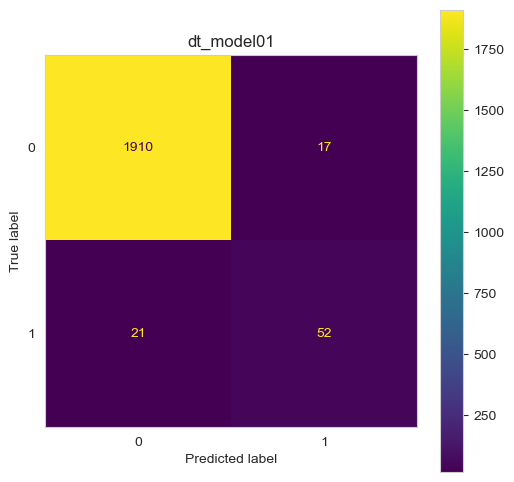

In [77]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model01'], display_labels=dt_model01.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model01')
plt.grid(None)
disp.plot(ax=ax)

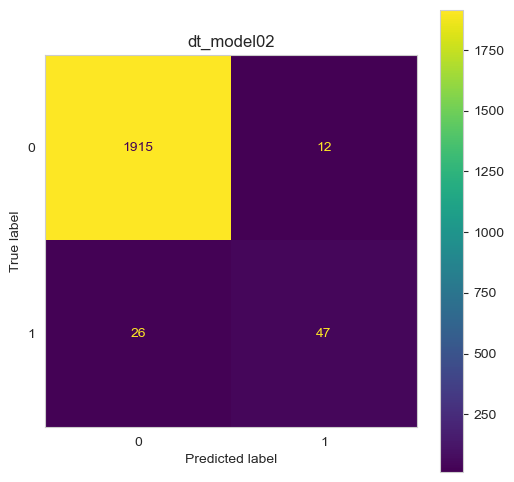

In [78]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model02'], display_labels=dt_model02.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model02')
plt.grid(None)
disp.plot(ax=ax)

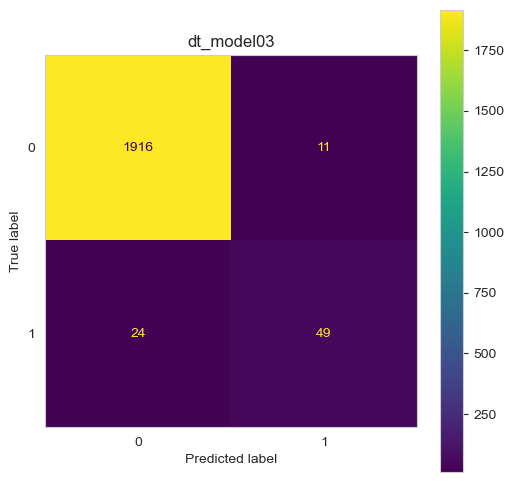

In [79]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model03'], display_labels=dt_model03.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model03')
plt.grid(None)
disp.plot(ax=ax)

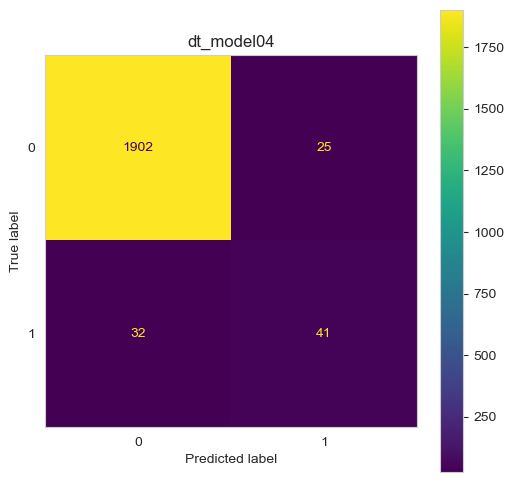

In [100]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model04'], display_labels=dt_model04.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model04')
plt.grid(None)
disp.plot(ax=ax)

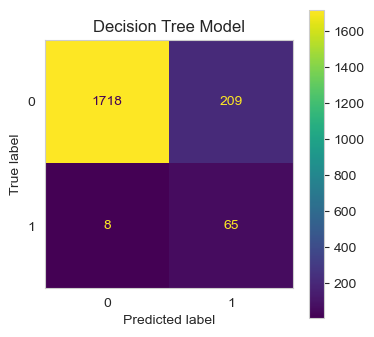

In [125]:
display = CMS['dt_model05']
display[0][0] = 1718
display[0][1] = 209
display[1][0] = 8
display[1][1] = 65

disp.plot(ax=ax)
disp = ConfusionMatrixDisplay(confusion_matrix=display, display_labels=dt_model05.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Decision Tree Model')
plt.grid(None)
disp.plot(ax=ax)

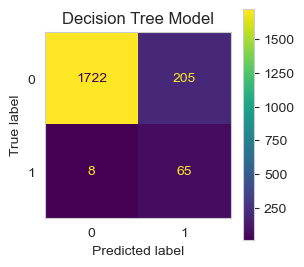

In [121]:
disp.plot(ax=ax)
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model05'], display_labels=dt_model05.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Decision Tree Model')
plt.grid(None)
disp.plot(ax=ax)





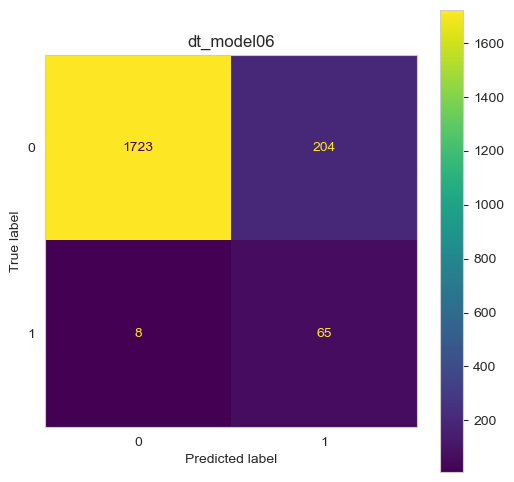

In [113]:
disp.plot(ax=ax)
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model06'], display_labels=dt_model05.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model06 ')
plt.grid(None)
disp.plot(ax=ax)

In [126]:
import os

n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 20
